In [6]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 128

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='sigmoid')(input_img)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape = (encoding_dim, ))

decoded_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoded_layer(encoded_input))

#compiling the autoencoder
autoencoder.compile(optimizer = 'adam', loss = 'mse')

(x_train, _),(x_test, _) = mnist.load_data()

#reshaping the input
x_train = x_train.reshape(x_train.shape[0], 784 )
x_test = x_test.reshape(x_test.shape[0], 784 )

x_train = x_train/255 
x_test = x_test/255 

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [7]:
#fitting the data into the autoencoder
autoencoder.fit(x_train, x_train, epochs=10)

x_test = x_test[:5]

Epoch 1/10
60000/60000 [==============================] - 33s 543us/sample - loss: 0.0363
Epoch 2/10
60000/60000 [==============================] - 34s 568us/sample - loss: 0.0137
Epoch 3/10
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0085
Epoch 4/10
60000/60000 [==============================] - 24s 398us/sample - loss: 0.0063
Epoch 5/10
60000/60000 [==============================] - 23s 379us/sample - loss: 0.0050
Epoch 6/10
60000/60000 [==============================] - 46s 773us/sample - loss: 0.0042
Epoch 7/10
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0036
Epoch 8/10
60000/60000 [==============================] - 20s 334us/sample - loss: 0.0031
Epoch 9/10
60000/60000 [==============================] - 21s 352us/sample - loss: 0.0028
Epoch 10/10
60000/60000 [==============================] - 20s 330us/sample - loss: 0.0026


In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

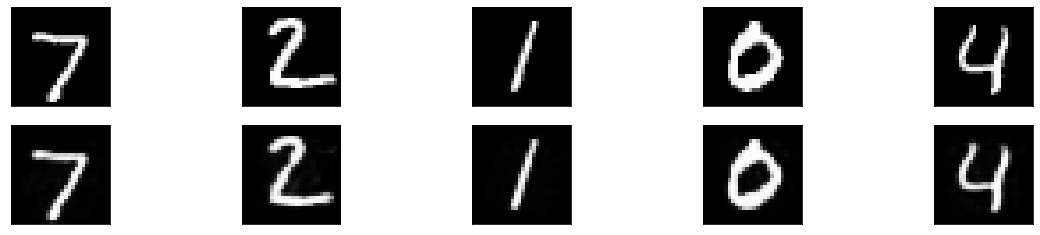

In [9]:
n = 5
plt.figure(figsize= (20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()